In [338]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json

# Import API key
import api_keys

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [220]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

weather_df = pd.DataFrame([])

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        weather_df = weather_df.append(pd.DataFrame({"City": city, "latitude":lat_lng[0], "longitude":lat_lng[1]}, index=[0]), ignore_index=True)

# Print the city count to confirm sufficient count
len(cities)

617

In [221]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

In [249]:
#Assign the parameters
units = "Imperial"
params = {"appid":  api_keys.api_key,
         "units" : units,
         "q" : ""}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in weather_df.iterrows():
    params["q"]= row["City"]
    response = requests.get(url, params=params).json()
    try:
        weather_df.loc[index,"Temperature"] = response["main"]["temp_max"]  
        weather_df.loc[index,"Humidity"] = response["main"]["humidity"]      
        weather_df.loc[index,"Cloudiness"] = response["clouds"]["all"]    
        weather_df.loc[index,"Wind Speed"] = response["wind"]["speed"] 
    except:
        pass

In [250]:
weather_df

,City,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,gangotri,30.849019,78.805065,NaN,NaN,NaN,NaN
1,rikitea,-76.188710,-137.611784,69.50,100.0,48.0,11.65
2,sambava,-13.747810,49.822679,71.93,100.0,20.0,16.91
3,jasidih,24.513232,86.942090,77.06,97.0,88.0,4.38
4,motygino,58.464749,95.668087,52.04,97.0,36.0,2.37
5,harper,-1.944551,-7.240092,96.98,18.0,1.0,6.93
6,shaunavon,48.917682,-107.788024,75.98,32.0,36.0,18.59
7,bluff,-74.669434,161.332336,54.83,85.0,64.0,4.05
8,mount gambier,-56.092649,128.170864,34.40,81.0,0.0,2.37
9,nanortalik,55.400010,-37.291162,41.06,99.0,76.0,41.74


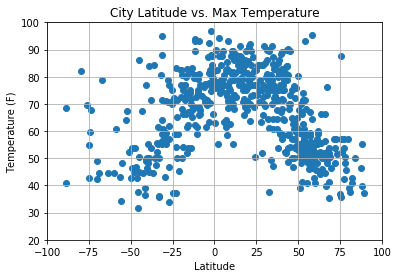

In [266]:
plt.scatter(weather_df["latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100, 100)
plt.ylim(20, 100)

#Show plot
plt.show()

In [ ]:
# Analysis : the farther away from 0 latitude you get the colder it gets. 

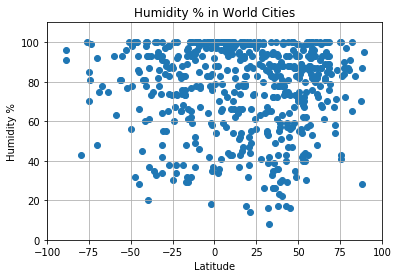

In [262]:
plt.scatter(weather_df["latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity % in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100, 100)
plt.ylim(0, 110)

#Show plot
plt.show()

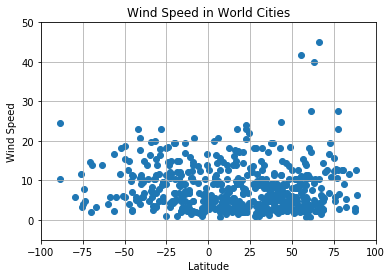

In [255]:
plt.scatter(weather_df["latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100, 100)
plt.ylim(-5, 50)

#Show plot
plt.show()

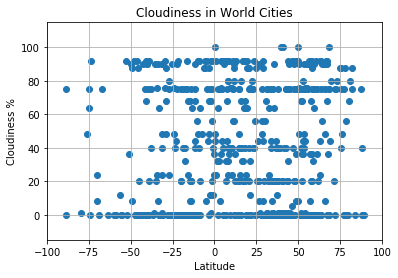

In [258]:
plt.scatter(weather_df["latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100, 100)
plt.ylim(-15, 115)

#Show plot
plt.show()